In [74]:
red = []
blue = []
color = []
for i in range(len(fossil1)):
    red.append([])
    blue.append([])
    color.append([])

for i in range(len(fossil1)):
    group = len(groups[1][fossil1[i]])
    #print(group)
    for subhalo in range(group):
        #print(groups[1][fossil1[subhalo]])
        #this calculate the color
        #color[i][subhalo] = subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][fossil1[i]][subhalo]] - subhalos['SubhaloStellarPhotometrics'][:,6][groups[1][fossil1[i]][subhalo]]
        color[i].append(subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][fossil1[i]][subhalo]] - subhalos['SubhaloStellarPhotometrics'][:,6][groups[1][fossil1[i]][subhalo]])
        #y[subhalo] = subhalos['SubhaloStellarPhotometrics'][:,5][group] - subhalos['SubhaloStellarPhotometrics'][:,6][group]
        #print(y[subhalo]>0.3)
        #print(f'color: {y[subhalo]}')
        if color[i][subhalo]>=0.3:
            #print('a')
            red[i].append(color[i][subhalo])
        else: 
            #print('b')
            blue[i].append(color[i][subhalo])

#reds = [fossil1, red]
#blues = [fossil1, blue]
        #if (y[i][j] < 0.30):
        #    blue[i].append(y[i][j])
        #else:
        #    red[i].append(y[i][j])
        

In [69]:
print(f'hay {len(blue[0])} galaxias azules y {len(red[0])} galaxias rojas en el grupo {fossil1[0]}')

hay 39 galaxias azules y 141 galaxias rojas en el grupo 0


In [70]:
frac1 = []
for i in range(len(fossil1)):
    frac1.append(len(blue[i])/(len(red[i])+len(blue[i])))


In [71]:
linea1 = np.median(frac1)
quart11 = np.quantile(frac1,0.25)
quart12 = np.quantile(frac1,0.75)

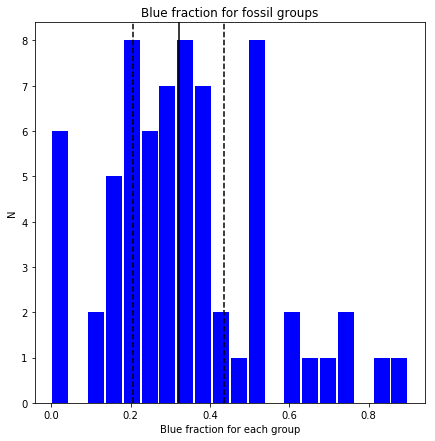

In [72]:
plt.figure(figsize=(7,7))
plt.title('Blue fraction for fossil groups')

plt.ylabel('N')
plt.xlabel('Blue fraction for each group')
plt.hist(frac1, bins=20, color = "blue", rwidth=0.9)
plt.axvline(linea1, color='black')
plt.axvline(quart11, color='black', linestyle='--')
plt.axvline(quart12, color='black', linestyle='--')

plt.savefig('bluefractionhist.jpg')

In [73]:
frac2 = []
for i in range(len(fossil1)):
    frac2.append(len(red[i])/(len(red[i])+len(blue[i])))

In [74]:
linea2 = np.median(frac2)
quart21 = np.quantile(frac2,0.25)
quart22 = np.quantile(frac2,0.75)

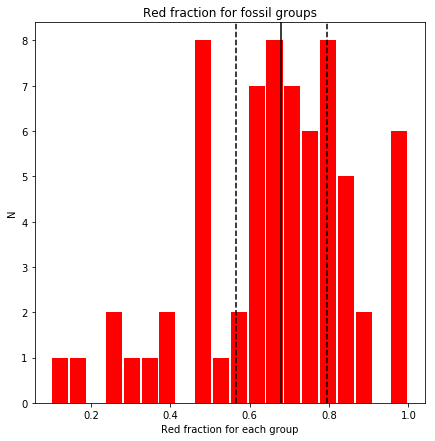

In [75]:
plt.figure(figsize=(7,7))
plt.title('Red fraction for fossil groups')

plt.ylabel('N')
plt.xlabel('Red fraction for each group')
plt.hist(frac2, bins=20, color = "red", rwidth=0.9)
plt.axvline(linea2, color='black')
plt.axvline(quart21, color='black', linestyle = '--')
plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('redfractionhist.jpg')

In [76]:
range(len(red))

range(0, 68)

In [77]:
#characterisize the virial radius
rcrit = (halos['Group_R_Crit200'][fossil1]/0.6774)
linea3 = np.median(rcrit)
quart31 = np.quantile(rcrit,0.25)
quart32 = np.quantile(rcrit,0.75)

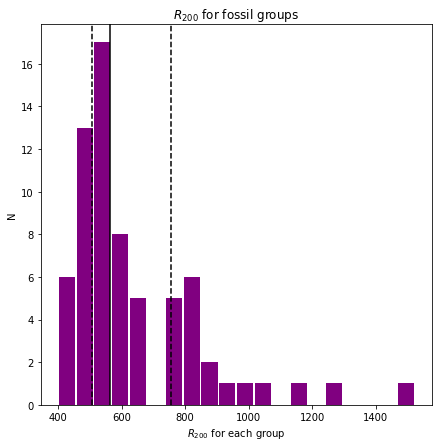

In [78]:
plt.figure(figsize=(7,7))
plt.title('$R_{200}$ for fossil groups')

plt.ylabel('N')
plt.xlabel('$R_{200}$ for each group')
plt.hist(rcrit, bins=20, color = "purple", rwidth=0.9)
plt.axvline(linea3, color='black')
plt.axvline(quart31, color='black', linestyle = '--')
plt.axvline(quart32, color='black', linestyle = '--')

plt.savefig('r200.jpg')
#make a median for a reference and dashed line with the quartils 

In [79]:
#make a match between the reds and their virial radius
r_red = []
r_blue = []
for i in range(len(frac2)):
    #red
    if quart21<frac2[i]<quart22 and rcrit[i]<quart32:
        r_red.append(fossil1[i])
    #blue
    elif quart11<frac1[i]<quart12 and rcrit[i]<quart32:
        r_blue.append(fossil1[i])
        
#calcular medianas y usar los quartiles 
#m200/r200 con puntitos azul y rojo en funcion de las galaxias rojas 


In [80]:
print(r_red)
print(f'los grupos que tienen un r200 menor a {quart32} y una fraccion de rojas entre {quart21} y {quart22} son {len(r_red)}')
print(r_blue)
print(f'los grupos que tienen un r200 menor a {quart32} y una fraccion de azules entre {quart11} y {quart12} son {len(r_blue)}')

[49, 57, 62, 65, 68, 69, 75, 77, 80, 83, 89, 95, 102, 107, 111, 120, 123, 126, 130, 151, 164, 165, 177, 179]
los grupos que tienen un r200 menor a 754.3158721248062 y una fraccion de rojas entre 0.5649350649350648 y 0.79375 son 24
[]
los grupos que tienen un r200 menor a 754.3158721248062 y una fraccion de azules entre 0.20625 y 0.43506493506493504 son 0


In [81]:
#m200 sobre r200
mass = []
radio = []
for i in range(len(fossil1)):
    mass.append(np.log10(halos['Group_M_Crit200'][fossil1[i]]/0.6774)+10)
    radio.append(halos['Group_R_Crit200'][fossil1[i]])

In [82]:
min(mass)

12.830488250737831

In [83]:
len(red[0])
#len(blue[0])
#onda esto seria para usar las galaxias totales de cada cumulo y clasificar, pero tendria que hacer un grafico por cada cumulo

141

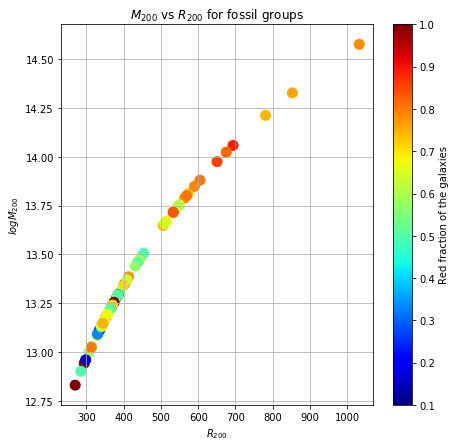

In [84]:
plt.figure(figsize=(7,7))
plt.title('$M_{200}$ vs $R_{200}$ for fossil groups')

#xy = np.vstack([radio,frac2])
z = frac2

plt.ylabel('$logM_{200}$')
plt.xlabel('$R_{200}$')
plt.grid()
plt.scatter(radio, mass, c=z, s=100, cmap='jet')
plt.colorbar(label='Red fraction of the galaxies')
#plt.legend(colorbar='fraccion de galaxias rojas')
plt.savefig('colors.jpg')

In [85]:
min(mass)

12.830488250737831